In [1]:
import uhd
import time
import numpy as np
import matplotlib.pyplot as plt
import logging

import pickle

In [2]:
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger("UHD Driver Tests")

In [5]:
def receive_samples(usrp, center_frequency=900e6, sampling_rate=1e6, gain=50, recv_for=60, write_to_file=False, filename=None):
    if write_to_file and filename is None:
        raise RuntimeError("Can't set write_to_file True without specifying a filename")
    logger.info("Receiving...")
    samples = []
    # start = time.time()
    # while time.time() - start < recv_for:
    samples.extend(usrp.recv_num_samps(1000000, center_frequency, sampling_rate, [0], gain)[0])
    logger.info(f"Received {len(samples)} samples")

    # Plot received sample in the Frequency Domain
    plt.psd(samples, NFFT=1024, Fs=1e6)
    plt.title("Frequency Domain")
    plt.show()
    
    # Plot received sample in the Time domain
    plt.plot(samples)
    plt.title("Time Domain")
    plt.show()
    
    if write_to_file:
        with open(filename, "wb+") as f:
            to_dump = {
                "sampling_rate": sampling_rate,
                "data": samples
            }
            pickle.dump(to_dump, f)

INFO:UHD Driver Tests:Receiving...
INFO:UHD Driver Tests:Received 1000000 samples


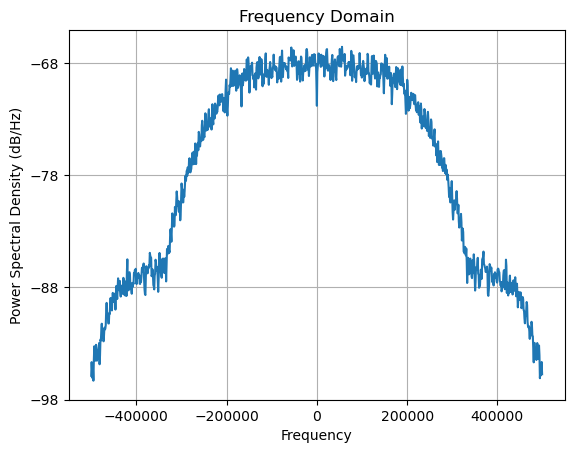

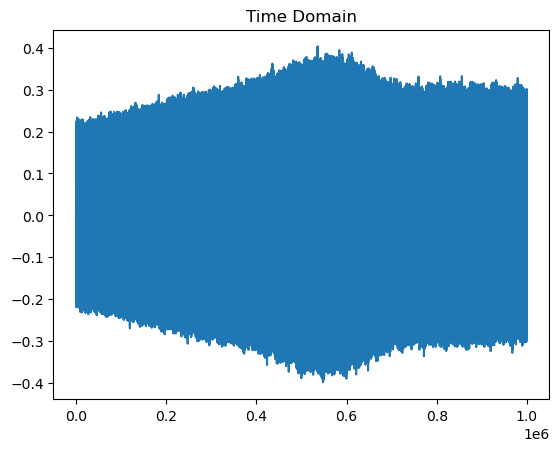

In [7]:
usrp = uhd.usrp.MultiUSRP()
usrp.set_rx_antenna("TX/RX", 0)
receive_samples(usrp, recv_for=300, write_to_file=True, filename="out.txt")